In [39]:
#Data
import pandas as pd
import numpy as np
import sympy as sp
import os
import pickle

#Plot
import matplotlib.pyplot as plt

#Model
from pysr import PySRRegressor, TemplateExpressionSpec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Load the Excel file
df = pd.read_excel('../report/DB.xlsx', sheet_name=1)

In [41]:
# # Gather data for article
# sdb1 = df.dropna()
# sdb1.to_excel('../report/SDB1.xlsx', index=False)

# db_unique = set(df['compA'].to_list()) | set(df['compB'].to_list())
# print(len(db_unique), 'unique compounds in the database')

# unique_mixtures = set(
#     tuple(sorted([a, b])) for a, b in zip(df['compA'], df['compB'])
# )
# print(len(unique_mixtures), 'unique mixtures in the database')

# # Save db_unique to excel
# db_unique_df = pd.DataFrame(list(db_unique), columns=['Unique Compounds'])
# db_unique_df.to_excel('../report/db_unique_compounds.xlsx', index=False)

# sdb1_unique = set(sdb1['compA'].to_list()) | set(sdb1['compB'].to_list())
# print(len(sdb1_unique), 'unique compounds in the SDB1')

# sdb1_unique_df = pd.DataFrame(list(sdb1_unique), columns=['Unique Compounds'])
# sdb1_unique_df.to_excel('../report/sdb1_unique_compounds.xlsx', index=False)

In [42]:
# # Real outputs
# output1 = '../report/DB_moreno_predict_only.xlsx'
# output2 = '../report/equation_results_wholedb_moreno_pred_only.xlsx' 

# Decoys
output1 = '../report/deleteme.xlsx'
output2 = output1
output3 = '../report/deleteme.xlsx'

In [43]:
# # Load the Excel file - Moreno's data
# df_excel = pd.read_excel("DB_unique+predict.xlsx")

In [44]:
# # Load the Excel file
# df_excel = pd.read_excel("DB_unique_xgb_predictions.xlsx")

In [45]:
# Load the Excel file
df_excel = pd.read_excel("DB_unique_svr_predictions.xlsx")

In [46]:
df

,compA,compB,XA,XB,T,P,K,CAS_A,SMILES_A,MW_A,CAS_B,SMILES_B,MW_B,mA,mB,KA,KB
0,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,304.01,100000,0.1229,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,NaN,NaN
1,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,314.00,100000,0.1218,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,NaN,NaN
2,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,324.01,100000,0.1211,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,NaN,NaN
3,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,333.98,100000,0.1204,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,NaN,NaN
4,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,344.15,100000,0.1194,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,322.02,100000,0.1397,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,NaN,NaN
3049,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,331.75,100000,0.1384,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,NaN,NaN
3050,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,341.92,100000,0.1354,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,NaN,NaN
3051,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,351.90,100000,0.1330,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,NaN,NaN


In [47]:
# Check for non-numeric values in df_merged['K']
df['K_numeric'] = pd.to_numeric(df['K'], errors='coerce')

# Get rows where the conversion resulted in NaN (meaning they had non-numeric values like '-')
error_rows = df[df['K_numeric'].isna()]

# Display those rows
print(error_rows)

Empty DataFrame
Columns: [compA, compB, XA, XB, T, P, K, CAS_A, SMILES_A, MW_A, CAS_B, SMILES_B, MW_B, mA, mB, KA, KB, K_numeric]
Index: []


In [48]:
# Drop rows where 'K_numeric' is NaN (i.e., invalid values like '-')
df_cleaned = df.dropna(subset=['K_numeric'])

# Optionally, drop the 'K_numeric' column if no longer needed
df_cleaned = df_cleaned.drop(columns=['K_numeric'])

In [49]:
# If want to keep exp values in df_cleaned
# Rename and merge
df_excel_A = df_excel.rename(columns={'SMILES': 'SMILES_A', 'K': 'KA_excel'})
df_merged = pd.merge(df_cleaned, df_excel_A[['SMILES_A', 'T', 'KA_excel']], 
                     on=['SMILES_A', 'T'], how='left')

# Prefer existing KA in df_cleaned if available
df_merged['KA'] = df_merged['KA'].combine_first(df_merged['KA_excel'])

# drop the temporary KA_excel column
df_merged.drop(columns='KA_excel', inplace=True)

df_excel_B = df_excel.rename(columns={'SMILES': 'SMILES_B', 'K': 'KB_excel'})
df_merged = pd.merge(df_merged, df_excel_B[['SMILES_B', 'T', 'KB_excel']], 
                     on=['SMILES_B', 'T'], how='left')

df_merged['KB'] = df_merged['KB'].combine_first(df_merged['KB_excel'])
df_merged.drop(columns='KB_excel', inplace=True)

In [50]:
# # If want to overwrite exp values
# df_cleaned = df_cleaned.drop(columns=['KA', 'KB'], errors='ignore')

# # Rename columns for merge
# df_excel_A = df_excel.rename(columns={'SMILES': 'SMILES_A', 'K': 'KA'})
# df_merged = pd.merge(df_cleaned, df_excel_A[['SMILES_A', 'T', 'KA']], on=['SMILES_A', 'T'], how='left')
# df_excel_B = df_excel.rename(columns={'SMILES': 'SMILES_B', 'K': 'KB'})
# df_merged = pd.merge(df_merged, df_excel_B[['SMILES_B', 'T', 'KB']], on=['SMILES_B', 'T'], how='left')

In [51]:
df_merged

,compA,compB,XA,XB,T,P,K,CAS_A,SMILES_A,MW_A,CAS_B,SMILES_B,MW_B,mA,mB,KA,KB
0,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,304.01,100000,0.1229,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.141259,0.141919
1,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,314.00,100000,0.1218,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.138925,0.140573
2,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,324.01,100000,0.1211,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.136235,0.138746
3,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,333.98,100000,0.1204,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.133638,0.136974
4,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,344.15,100000,0.1194,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.131180,0.135385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,322.02,100000,0.1397,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,0.127575,0.136221
3049,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,331.75,100000,0.1384,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,0.124880,0.136019
3050,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,341.92,100000,0.1354,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,0.122233,0.135089
3051,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,351.90,100000,0.1330,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,0.119316,0.133046


In [52]:
df_merged.to_excel(output1, index=False)

In [53]:
# # Replace df_merged with predicted df
# df_merged = pd.read_excel('../report/DB_svr_predict+exp.xlsx', sheet_name='DB_remove_outliers')

APPLY WHOLE EQUATIONS

In [54]:
# # First, group by the combination of 'compA' and 'compB' to count occurrences
# mixture_counts = df_merged.groupby(['compA', 'compB']).size()

# # Filter out mixtures that appear 2 or fewer times
# valid_mixtures = mixture_counts[mixture_counts > 2].index

# # Now, filter your original dataframe to keep only those rows with valid mixtures
# df_filtered = df_merged[df_merged.set_index(['compA', 'compB']).index.isin(valid_mixtures)]

# # Remove rows where any column has the value '149-32-6' - has weird SMILES & value > 0.3
# df_merged = df_filtered.loc[~df_filtered.isin(['149-32-6']).any(axis=1)]
# # # Remove rows where any column has the value '115-77-5' - only 1 datapoint, cant guarantee methodology
# # df_merged = df_filtered.loc[~df_filtered.isin(['115-77-5']).any(axis=1)]

In [55]:
df_merged

,compA,compB,XA,XB,T,P,K,CAS_A,SMILES_A,MW_A,CAS_B,SMILES_B,MW_B,mA,mB,KA,KB
0,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,304.01,100000,0.1229,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.141259,0.141919
1,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,314.00,100000,0.1218,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.138925,0.140573
2,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,324.01,100000,0.1211,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.136235,0.138746
3,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,333.98,100000,0.1204,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.133638,0.136974
4,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,344.15,100000,0.1194,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668,0.783947,0.216053,0.131180,0.135385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,322.02,100000,0.1397,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,0.127575,0.136221
3049,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,331.75,100000,0.1384,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,0.124880,0.136019
3050,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,341.92,100000,0.1354,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,0.122233,0.135089
3051,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,351.90,100000,0.1330,1120-21-4,CCCCCCCCCCC,156.3106,124-10-7,CCCCCCCCCCCCCC(=O)OC,242.4008,0.217467,0.782533,0.119316,0.133046


In [56]:
df_merged['mAKA'] = df_merged['mA'] * df_merged['KA']
df_merged['mBKB'] = df_merged['mB'] * df_merged['KB']

In [57]:
selected_columns = ['mA', 'mB', 'T', 'KA', 'KB', 'mAKA', 'mBKB']  # adjust as needed
df_new = df_merged[selected_columns]
y_true = df_merged['K']

info_columns = ['compA', 'compB', 'SMILES_A', 'SMILES_B']
df_info = df_merged[info_columns]

EVALUATE MODELS

In [58]:
# Path to the 'outputs' folder
path = '../linux_outputs/10K'

# Get a list of folder names inside the 'outputs' folder
folder_names = [os.path.join(path,f).replace('\\', '/') for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

# Print the list of folder names
print(folder_names)

['../linux_outputs/10K/20250407_111454_B7bKDy', '../linux_outputs/10K/20250407_115912_M4dvpu', '../linux_outputs/10K/20250407_125503_3SEVTh', '../linux_outputs/10K/20250407_134306_L5ya7j', '../linux_outputs/10K/20250408_152854_qNpDzj', '../linux_outputs/10K/20250408_160226_7tuMuV', '../linux_outputs/10K/20250408_163850_vyfftu', '../linux_outputs/10K/20250408_171835_iJ6HKe', '../linux_outputs/10K/20250409_095336_s1iQOw', '../linux_outputs/10K/20250409_105247_yk2cuk', '../linux_outputs/10K/20250409_113752_Tc4GSi', '../linux_outputs/10K/20250409_120816_1fthha', '../linux_outputs/10K/20250410_100349_cCxrnR', '../linux_outputs/10K/20250410_142914_1Y9BD4', '../linux_outputs/10K/20250411_131629_9zMX4d', '../linux_outputs/10K/20250411_172421_Y9VWr1', '../linux_outputs/10K/20250430_161345_EP8N1d', '../linux_outputs/10K/20250430_161706_wdOpae', '../linux_outputs/10K/20250430_171549_KcqsQc', '../linux_outputs/10K/20250430_171656_5h8Eky', '../linux_outputs/10K/20250505_142752_2ftXh4', '../linux_ou

In [59]:
folder_index = 14 - 1 #Change the first value to run number
model = PySRRegressor.from_file(run_directory=folder_names[folder_index])

Attempting to load model from ..\linux_outputs\10K\20250410_142914_1Y9BD4\checkpoint.pkl...


In [60]:
# # Condition where KB > KA
# swap_mask = df_new['KB'] > df_new['KA']

# # Swap values where condition is met
# df_new.loc[swap_mask, ['KA', 'KB']] = df_new.loc[swap_mask, ['KB', 'KA']].values
# df_new.loc[swap_mask, ['mA', 'mB']] = df_new.loc[swap_mask, ['mB', 'mA']].values

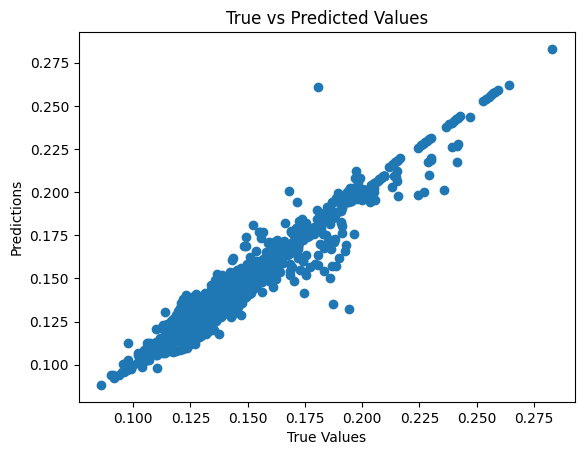

In [61]:
# If the model is loaded, perform the calculations
model.get_best().equation
y_pred = model.predict(df_new)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

plt.scatter(y_true, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [62]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"Precentage Error: {np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%")

RMSE: 0.005574876430243173
R2 Score: 0.9313922217781747
Precentage Error: 2.41%


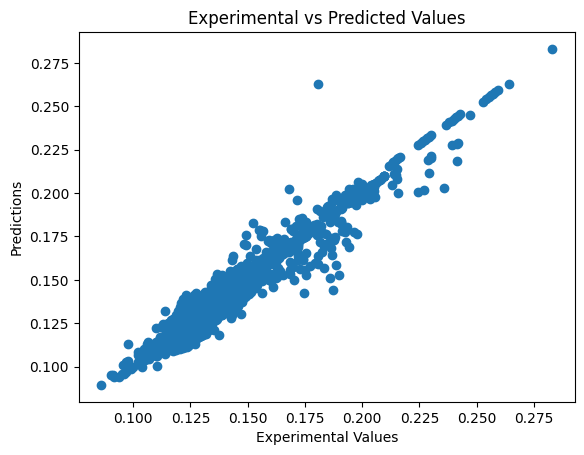

In [63]:
y_pred = df_new['KB']/(df_new['mB'] + df_new['KB']*df_new['mA']/df_new['KA'])
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

plt.scatter(y_true, y_pred)
plt.xlabel('Experimental Values')
plt.ylabel('Predictions')
plt.title('Experimental vs Predicted Values')
plt.show()

In [64]:
# # Export y_true and y_pred to excel
# output_df = pd.DataFrame({'Experimental Values': y_true, 'Predictions': y_pred})

# #Concate df_info, df_new and output_df
# output_df = pd.concat([df_info.reset_index(drop=True), df_new.reset_index(drop=True), output_df.reset_index(drop=True)], axis=1)
# output_df.to_excel('predictions_DB.xlsx', index=False)

In [65]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"Precentage Error: {np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%")

RMSE: 0.005481466445743306
R2 Score: 0.9336720790692885
Precentage Error: 2.46%


In [75]:
test_df = pd.read_excel('../report/results.xlsx', sheet_name=2)
test_df

,Experimental Value,XGB (Pred Only),SVR (Pred Only),Moreno (Pred Only),XGB (Pred + Exp),SVR (Pred + Exp),Moreno (Pred +Exp)
0,0.1229,0.135238,0.141401,0.123873,0.135238,0.141401,0.123873
1,0.1218,0.133458,0.139278,0.123090,0.133458,0.139278,0.123090
2,0.1211,0.132087,0.136770,0.122310,0.132087,0.136770,0.122310
3,0.1204,0.131434,0.134345,0.121538,0.131434,0.134345,0.121538
4,0.1194,0.128384,0.132066,0.120756,0.128384,0.132066,0.120756
...,...,...,...,...,...,...,...
3048,0.1397,0.137580,0.134242,0.126813,0.137580,0.134242,0.126813
3049,0.1384,0.135028,0.133430,0.124765,0.135028,0.133430,0.124765
3050,0.1354,0.133235,0.132068,0.122621,0.133235,0.132068,0.122621
3051,0.1330,0.134220,0.129798,0.120515,0.134220,0.129798,0.120515


In [78]:
rmse = np.sqrt(mean_squared_error(test_df['Experimental Value'], test_df['Moreno (Pred +Exp)']))
r2 = r2_score(test_df['Experimental Value'], test_df['Moreno (Pred +Exp)'])
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0055176012813844145
R2 Score: 0.9327947049400371


In [1579]:
import plotly.express as px
# Assuming df_new contains  dataset and y_true, y_pred are the true and predicted values
df_new['y_true'] = y_true
df_new['y_pred'] = y_pred

# Create an interactive scatter plot
fig = px.scatter(df_new, x='y_true', y='y_pred', title='True vs Predicted Values', 
                 labels={'y_true': 'True Values', 'y_pred': 'Predictions'},
                 hover_data=df_new.columns)  # Hover over to see the details

# Show the plot
fig.show()

C:\Users\leth\AppData\Local\Temp\ipykernel_22672\367739937.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\leth\AppData\Local\Temp\ipykernel_22672\367739937.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1580]:
df_new.to_excel(output3, index=False)

FILLIPOV

In [1385]:
C = 0.72
y_pred = (C*df_new['mB']*df_new['mB'] + df_new['mB']*(1-C))*(df_new['KB']-df_new['KA'])+df_new['KA']
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mae = np.mean(np.abs(y_true - y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.005807875333718016
RMSE: 0.0076678977730131395
R2 Score: 0.8702057380890723


In [1386]:
C = 0.5
y_pred = (C*df_new['mB']*df_new['mB'] + df_new['mB']*(1-C))*(df_new['KB']-df_new['KA'])+df_new['KA']
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mae = np.mean(np.abs(y_true - y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.005543886898197789
RMSE: 0.007235851957549709
R2 Score: 0.8844201277545318


Jamieson and Irving 

In [1387]:
def calc_K(df):
    if df['KA'] > df['KB']:
        return df['KA'] * df['mA'] + df['KB'] * df['mB'] - (df['KA'] - df['KB']) * df['mA'] * (1 - np.sqrt(df['mA']))
    else:
        return df['KA'] * df['mA'] + df['KB'] * df['mB'] - (df['KB'] - df['KA']) * df['mB'] * (1 - np.sqrt(df['mB']))

y_pred = df_new.apply(calc_K, axis=1)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mae = np.mean(np.abs(y_true - y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.005265272195847371
RMSE: 0.0069456809047891595
R2 Score: 0.8935041905048494


RED EQUATIONS

In [1388]:
# Path to the 'outputs' folder
path = '../linux_outputs/10K_red'
# Get a list of folder names inside the 'outputs' folder
folder_names_red = [os.path.join(path,f).replace('\\', '/') for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

In [1389]:
folder_index = 17 - 1 #Change the first value to run number
model = PySRRegressor.from_file(run_directory=folder_names_red[folder_index])

Attempting to load model from ..\linux_outputs\10K_red\20250430_103309_BV4HyP\checkpoint.pkl...


In [1390]:
model.get_best().equation

'(mB * mA) * ((abs((KB - KA) * (KB - 0.20966384)) / (0.20954196 - KB)) * -0.585045)'

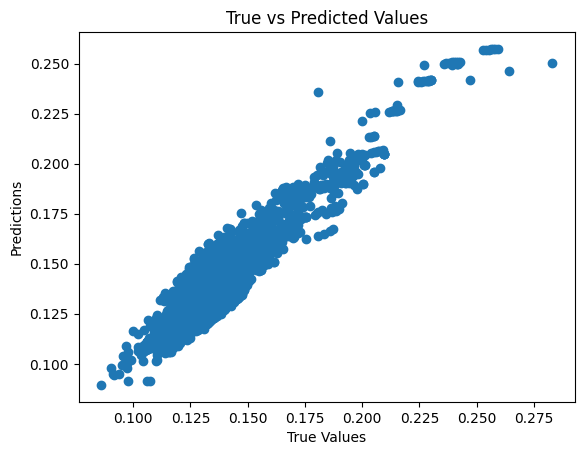

In [1391]:
# If the model is loaded, perform the calculations
y_pred = df_new['KA']*df_new['mA'] + df_new['KB']*df_new['mB'] - 0.585045*df_new['mB']*df_new['mA']*((abs(df_new['KB'] - df_new['KA'])*(df_new['KB']-0.20966384))/(0.20954196 - df_new['KB']))
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

plt.scatter(y_true, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

ALL EQUATIONS PER CHECKPOINT

In [1392]:
with open('../linux_outputs/10K/20250506_095737_xWpjxU/checkpoint.pkl', 'rb') as f:
     checkpoint = pickle.load(f)

equations_df = checkpoint.equations_
equations_df

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,0.000266,KB,0.000000e+00,KB,PySRFunction(X=>KB)
1,3,0.000169,KB / 0.9312176,2.282955e-01,1.07386286513485*KB,PySRFunction(X=>1.07386286513485*KB)
2,4,0.000106,sqrt(KA * KB),4.666669e-01,sqrt(KA*KB),PySRFunction(X=>sqrt(KA*KB))
3,6,0.000105,sqrt(KA * (KB + -0.0018817218)),4.990314e-03,sqrt(KA*(KB - 0.0018817218)),PySRFunction(X=>sqrt(KA*(KB - 0.0018817218)))
4,7,0.000016,KA + (mB * (KB - KA)),1.886381e+00,KA + mB*(-KA + KB),PySRFunction(X=>KA + mB*(-KA + KB))
5,9,0.000013,KA - ((mB + 0.058679853) * (KA - KB)),1.065685e-01,KA - (KA - KB)*(mB + 0.058679853),PySRFunction(X=>KA - (KA - KB)*(mB + 0.0586798...
6,10,0.000012,((mA * sqrt(mA)) * (KA - KB)) + KB,4.039084e-02,KB + mA**(3/2)*(KA - KB),PySRFunction(X=>KB + mA**(3/2)*(KA - KB))
7,11,0.000012,KB - ((KB + ((mB * 0.011559093) - KA)) * mA),1.450456e-02,KB - mA*(-KA + KB + 0.011559093*mB),PySRFunction(X=>KB - mA*(-KA + KB + 0.01155909...
8,12,0.000011,KA - ((KA - KB) * log(1.6532625 * (mB + 0.6133...,1.073147e-01,KA - (KA - KB)*log(1.6532625*mB + 1.014065587455),PySRFunction(X=>KA - (KA - KB)*log(1.6532625*m...
9,14,0.000011,KA - ((log((mB * 1.6304604) + 0.99842536) * (K...,6.104769e-03,KA - (KA - KB)*log(1.6304604*mB + 0.99842536) ...,PySRFunction(X=>KA - (KA - KB)*log(1.6304604*m...


In [1393]:
# results = []

# for i, row in equations_df.iterrows():
#     try:
#         # Parse the sympy expression
#         expr = sp.sympify(row['sympy_format'])

#         # Extract all the symbols used in the equation
#         variables = sorted(expr.free_symbols, key=lambda s: str(s))  # keep it deterministic

#         # Convert sympy expression into a NumPy-compatible function
#         f_lambdified = sp.lambdify(variables, expr, modules='numpy')

#         # Prepare inputs: for each variable, get its column values from X_test
#         input_arrays = [df_new[str(var)].values for var in variables]

#         # Evaluate the expression
#         y_pred = f_lambdified(*input_arrays)
#         y_pred = np.asarray(y_pred).flatten()

#         # Compute metrics
#         rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#         r2 = r2_score(y_true, y_pred)

#         results.append({
#             'equation': str(expr),
#             'rmse': rmse,
#             'r2': r2,
#             'loss': row.get('loss', None),
#             'complexity': row.get('complexity', None)
#         })

#     except Exception as e:
#         print(f"Error evaluating equation {i}: {e}")

In [1394]:
# results_df = pd.DataFrame(results)
# results_df.sort_values(by='rmse', inplace=True)  # or by 'r2' descending
# results_df

In [1395]:
df_new1 = df_new.copy()

In [1396]:
# # Apply to test set of SDB1 instead of whole DB
# with open('../data/X_test_all_2.pkl', 'rb') as f:
#     df_new1 = pickle.load(f)
# with open('../data/y_test_all_2.pkl', 'rb') as f:
#     y_true = pickle.load(f)

In [1397]:
# Root path to folders
base_path = '../linux_outputs/10K'

# Get folder paths
folder_paths = sorted([
    os.path.join(base_path, f).replace('\\', '/')
    for f in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, f))
])

# Batches where KB > KA swap is needed
swap_batches = {3, 9, 10, 15, 22}

all_results = []

for batch_num, folder in enumerate(folder_paths, start=1):
    checkpoint_path = os.path.join(folder, 'checkpoint.pkl')

    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint not found in {folder}, skipping.")
        continue

    try:
        with open(checkpoint_path, 'rb') as f:
            model = pickle.load(f)
        equations_df = model.equations_

        # Make a copy of the input data
        df_new = df_new1.copy() #Change to df_new1 if using test set

        # Apply swapping conditionally
        if batch_num in swap_batches:
            swap_mask = df_new['KB'] > df_new['KA']
            df_new.loc[swap_mask, ['KA', 'KB']] = df_new.loc[swap_mask, ['KB', 'KA']].values
            df_new.loc[swap_mask, ['mA', 'mB']] = df_new.loc[swap_mask, ['mB', 'mA']].values
            try:
                df_new.loc[swap_mask, ['Tr_A', 'Tr_B']] = df_new.loc[swap_mask, ['Tr_B', 'Tr_A']].values
            
            except Exception as e:
                print(f"Error swapping Tr values in batch {batch_num}: {e}")

        for i, row in equations_df.iterrows():
            try:
                expr = sp.sympify(row['sympy_format'])
                variables = sorted(expr.free_symbols, key=lambda s: str(s))
                f_lambdified = sp.lambdify(variables, expr, modules='numpy')
                input_arrays = [df_new[str(var)].values for var in variables]
                y_pred = np.asarray(f_lambdified(*input_arrays)).flatten()

                r2 = r2_score(y_true, y_pred)
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = np.mean(np.abs(y_true - y_pred))
                dev = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

                all_results.append({
                    'batch': batch_num,
                    'equation': str(expr),
                    'r2': r2,
                    'rmse': rmse,
                    'mae': mae,
                    'deviation': dev,
                    'complexity': row.get('complexity', None),
                    'loss': row.get('loss', None),
                    'folder': folder
                })

            except Exception as e:
                print(f"Error evaluating equation {i} in batch {batch_num}: {e}")

    except Exception as e:
        print(f"Error loading checkpoint from {folder}: {e}")


Error evaluating equation 18 in batch 1: 'Tr_A'
Error evaluating equation 19 in batch 1: 'Tr_A'
Error evaluating equation 20 in batch 1: 'Tr_A'
Error evaluating equation 21 in batch 1: 'Tr_A'
Error evaluating equation 22 in batch 1: 'Tr_A'
Error evaluating equation 23 in batch 1: 'Tr_A'
Error evaluating equation 24 in batch 1: 'Tr_A'
Error evaluating equation 25 in batch 1: 'Tr_A'
Error evaluating equation 26 in batch 1: 'Tr_A'
Error evaluating equation 20 in batch 2: 'Tr_B'
Error evaluating equation 21 in batch 2: 'Tr_B'
Error evaluating equation 22 in batch 2: 'Tr_B'
Error evaluating equation 23 in batch 2: 'Tr_B'
Error evaluating equation 24 in batch 2: 'Tr_B'
Error evaluating equation 25 in batch 2: 'Tr_B'
Error swapping Tr values in batch 3: "None of [Index(['Tr_B', 'Tr_A'], dtype='object')] are in the [columns]"
Error evaluating equation 13 in batch 3: 'Tr_B'
Error evaluating equation 14 in batch 3: 'Tr_B'
Error evaluating equation 15 in batch 3: 'Tr_A'
Error evaluating equation 

In [1398]:
results_df = pd.DataFrame(all_results)
results_df.sort_values(by=['rmse'], inplace=True)
results_df

,batch,equation,r2,rmse,mae,deviation,complexity,loss,folder
47,3,KB + mA*(KA - KB)/(mA*mB + 1.0079758),0.903498,0.006612,0.005091,3.662638,13,0.000011,../linux_outputs/10K/20250407_125503_3SEVTh
153,10,KB - mA*(-KA + KB)/(mA*mB + 1.0079758),0.903498,0.006612,0.005091,3.662638,13,0.000011,../linux_outputs/10K/20250409_105247_yk2cuk
257,15,KB + mA*(KA - KB)/(mA*mB + 1.007997),0.903497,0.006612,0.005091,3.662642,13,0.000011,../linux_outputs/10K/20250411_131629_9zMX4d
140,9,KB - mA*(-KA + KB)/(mA*mB + 1.0079983),0.903497,0.006612,0.005091,3.662643,13,0.000011,../linux_outputs/10K/20250409_095336_s1iQOw
149,10,KA/(KA*mB/KB + mA),0.903364,0.006616,0.005059,3.636136,9,0.000012,../linux_outputs/10K/20250409_105247_yk2cuk
...,...,...,...,...,...,...,...,...,...
171,12,0.977524464260386*KA,0.345978,0.017213,0.013313,9.292859,3,0.000320,../linux_outputs/10K/20250409_120816_1fthha
312,17,14.709015*KB + KB/(mB + KB*mA/KA) + 14.709015*...,-0.004990,0.021337,0.005629,3.988305,20,0.000009,../linux_outputs/10K/20250430_161345_EP8N1d
199,13,-0.00037787252*mA*mB/Abs(KB - 0.18482287) + mA...,-1.067342,0.030602,0.006473,4.541933,14,0.000011,../linux_outputs/10K/20250410_100349_cCxrnR
209,13,mAKA + mBKB/(1.0037167 + 0.51716346*Abs(mA*(KA...,-17.033903,0.090384,0.007112,5.267588,28,0.000006,../linux_outputs/10K/20250410_100349_cCxrnR


In [1399]:
results_df.to_excel(output2, index=False)

3-comp and 4-comp

In [129]:
df3 = pd.read_excel('../report/results.xlsx', sheet_name=1)
df3
print('R2_QSPR:', r2_score(df3['K_real'], df3['K_pred_QSPR+SR']))
print('RMSE_QSPR:', np.sqrt(mean_squared_error(df3['K_real'], df3['K_pred_QSPR+SR'])))
print('MAE_QSPR:', np.mean(np.abs(df3['K_real'] - df3['K_pred_QSPR+SR'])))

R2_QSPR: 0.93852890840793
RMSE_QSPR: 0.0048179064475474785
MAE_QSPR: 0.004169187894508057


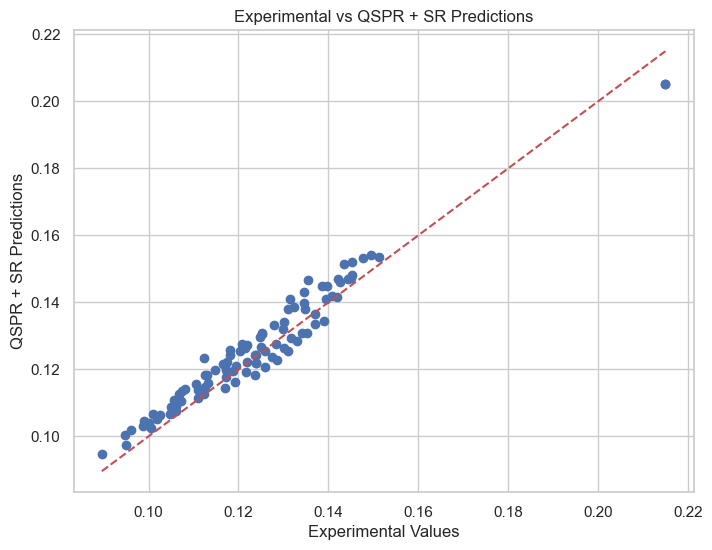

In [130]:
# Draw parity plot with trendline
plt.figure(figsize=(8, 6))
plt.scatter(df3['K_real'], df3['K_pred_QSPR+SR'])
plt.xlabel('Experimental Values')
plt.ylabel('QSPR + SR Predictions')
plt.title('Experimental vs QSPR + SR Predictions')
plt.plot([df3['K_real'].min(), df3['K_real'].max()],
            [df3['K_real'].min(), df3['K_real'].max()], 'r--')  # Add a trendline
plt.show()

In [131]:
df3_sr = df3.dropna()
print('R2_SR:', r2_score(df3_sr['K_real'], df3_sr['K_pred_SR']))
print('RMSE_SR:', np.sqrt(mean_squared_error(df3_sr['K_real'], df3_sr['K_pred_SR'])))
print('MAE_SR:', np.mean(np.abs(df3_sr['K_real'] - df3_sr['K_pred_SR'])))

R2_SR: 0.8796360071320077
RMSE_SR: 0.004149367360369955
MAE_SR: 0.003678477239809669


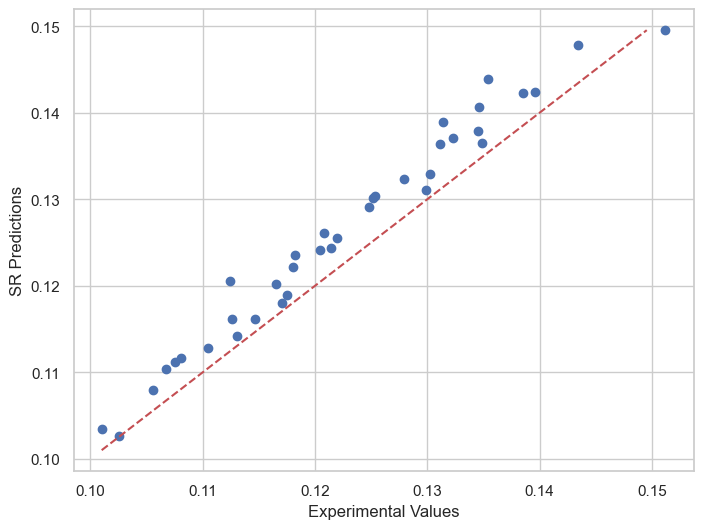

In [132]:
# Draw parity plot with trendline
plt.figure(figsize=(8, 6))
plt.scatter(df3_sr['K_real'], df3_sr['K_pred_SR'])
plt.xlabel('Experimental Values')
plt.ylabel('SR Predictions')
plt.plot([df3_sr['K_real'].min(), df3_sr['K_pred_SR'].max()], 
         [df3_sr['K_real'].min(), df3_sr['K_pred_SR'].max()], 'r--')  # Add a trendline
plt.show()

In [133]:
df4 = pd.read_excel('../report/results.xlsx', sheet_name=2)
print('R2_QSPR:', r2_score(df4['K_real'], df4['K_pred_QSPR+SR']))
print('RMSE_QSPR:', np.sqrt(mean_squared_error(df4['K_real'], df4['K_pred_QSPR+SR'])))
print('MAE_QSPR:', np.mean(np.abs(df4['K_real'] - df4['K_pred_QSPR+SR'])))

R2_QSPR: 0.9520285752971747
RMSE_QSPR: 0.005312771536636953
MAE_QSPR: 0.0032628827810639023


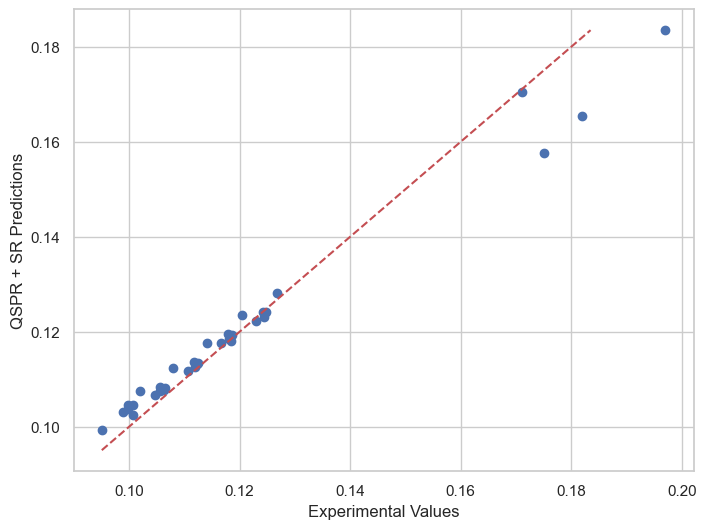

In [134]:
# Draw parity plot with trendline for SR
plt.figure(figsize=(8, 6))
plt.scatter(df4['K_real'], df4['K_pred_QSPR+SR'])
plt.xlabel('Experimental Values')
plt.ylabel('QSPR + SR Predictions')
plt.plot([df4['K_real'].min(), df4['K_pred_QSPR+SR'].max()],
         [df4['K_real'].min(), df4['K_pred_QSPR+SR'].max()], 'r--')  # Add a trendline
plt.show()